# Data Exploration & Preprocessing
---

### Dataset
The Wine Quality dataset from the UCI Machine Learning Repository contains information about red and white wines, with various  attributes (like pH, alcohol, and sugar content) and a quality score rated between 0 and 10. The dataset has 1599 samples of red wine and 4898 samples of white wine.

**Objective:** Perform EDA to understand the structure of the dataset, handle missing values, identify outliers, and preprocess the data for further analysis.

---

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset
red_wine = pd.read_csv("winequality-red.csv", delimiter=';')
white_wine = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine datasets for easier analysis
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Display the structure of the dataset
wine_data.info()
wine_data.head()



<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Check missing values
The dataset has 12 features and a target variable (`quality`). There are no missing values in the dataset, as indicated by the `.info()` output. The target variable `quality` has values ranging from 3 to 8, and there is an additional column `wine_type` to differentiate between red and white wines.


In [ ]:

# Checking for missing values
wine_data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64



#### **Summary Statistics**
We calculated the summary statistics to understand the central tendency, dispersion, and overall distribution of the numeric features.

---

In [ ]:

# Summary statistics
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000




### Observation
From the summary statistics, we observe:
- `residual sugar` has a wide range, indicating the potential presence of outliers.
- Most features have values concentrated within specific ranges.

#### **Outliers Analysis**
We used Z-scores to detect outliers in numeric columns.

---



In [ ]:

# Detecting outliers using Z-score
z_scores = wine_data.iloc[:, :-1].apply(zscore)
outliers = (z_scores.abs() > 3).sum()


### Cap values with threshold
The outliers are more prevalent in `residual sugar`, `free sulfur dioxide`, and `total sulfur dioxide`. These features will be handled by capping extreme values to a threshold.

---

In [ ]:

# Handling outliers by capping them
for column in ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']:
    q1 = wine_data[column].quantile(0.25)
    q3 = wine_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    wine_data[column] = wine_data[column].clip(lower=lower_bound, upper=upper_bound)


### Scale features
We normalized numeric features to bring them to a comparable scale. The features were scaled using Min-Max scaling.

---

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_data.iloc[:, :-1] = scaler.fit_transform(wine_data.iloc[:, :-1])


C:\Users\John\AppData\Local\Temp\ipykernel_9976\3552124630.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.33333333 0.33333333 0.33333333 ... 0.5        0.66666667 0.5       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine_data.iloc[:, :-1] = scaler.fit_transform(wine_data.iloc[:, :-1])


### One-hot encode
To preprocess the data further, categorical variables were encoded using one-hot encoding.

---


In [ ]:

# Encoding the wine_type column
wine_data = pd.get_dummies(wine_data, columns=['wine_type'], drop_first=True)


### Findings:
1. No missing values were found in the dataset.
2. Outliers were identified in `residual sugar`, `free sulfur dioxide`, and `total sulfur dioxide` and handled using capping.
3. Features were normalized to the range [0, 1].
4. The dataset was successfully encoded to include categorical variables.

This prepared dataset is now ready for further modeling and analysis.





# Model Selection & Training

---

### Model Selection:
I decided to use the following models to predict wine quality:

Random Forest Regressor: Random forests are robust against overfitting, handle non-linear relationships well, and can capture interactions between features. Additionally, they perform well with datasets that have both numerical and categorical data.
Gradient Boosting Regressor (GBR): Gradient boosting models, like XGBoost or LightGBM, are powerful for structured data and excel in predictive accuracy. They can handle imbalanced datasets and focus on minimizing errors iteratively.
I chose these models due to their strong predictive capabilities for regression tasks and because the dataset features (e.g., residual sugar, alcohol, pH) have complex relationships with the target variable (quality).


Features were already normalized to the range [0, 1].
Categorical variable (wine_type) was one-hot encoded.
Target variable remained unchanged as it represents the quality score.


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the data
X = wine_data.drop(columns='quality')
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)

print("Random Forest - MAE:", rf_mae, "MSE:", rf_mse)
print("Gradient Boosting - MAE:", gbr_mae, "MSE:", gbr_mse)


Random Forest - MAE: 0.07293333333333334 MSE: 0.010260282051282052
Gradient Boosting - MAE: 0.08862090478491787 MSE: 0.012788211946596633


### Interpretation and Insights:

The Random Forest Regressor outperformed the Gradient Boosting Regressor in terms of both MAE and MSE, likely due to its ability to handle variance within the dataset.
The Gradient Boosting Regressor, while powerful, might require additional tuning of hyperparameters to improve performance.

### Hyperparameter Tuning with Grid Search

To improve the performance of the models, I conducted hyperparameter tuning using Grid Search. This approach evaluates various combinations of hyperparameters to identify the optimal configuration for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

# Best Random Forest parameters
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

# Hyperparameter tuning for Gradient Boosting
gbr_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gbr_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

gbr_grid_search.fit(X_train, y_train)

# Best Gradient Boosting parameters
best_gbr_model = gbr_grid_search.best_estimator_
print("Best Gradient Boosting Parameters:", gbr_grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


### Model Re-evaluation

Using the best hyperparameters obtained from Grid Search, I retrained both models and re-evaluated their performance on the test data.

In [ ]:
# Predictions with tuned models
rf_tuned_predictions = best_rf_model.predict(X_test)
gbr_tuned_predictions = best_gbr_model.predict(X_test)

# Evaluation of tuned models
rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_predictions)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_predictions)

gbr_tuned_mae = mean_absolute_error(y_test, gbr_tuned_predictions)
gbr_tuned_mse = mean_squared_error(y_test, gbr_tuned_predictions)

print(f"Tuned Random Forest - MAE: {rf_tuned_mae:.4f}, MSE: {rf_tuned_mse:.4f}")
print(f"Tuned Gradient Boosting - MAE: {gbr_tuned_mae:.4f}, MSE: {gbr_tuned_mse:.4f}")


Tuned Random Forest - MAE: 0.0726, MSE: 0.0102
Tuned Gradient Boosting - MAE: 0.0699, MSE: 0.0111


### Feature Importance Analysis

To understand the impact of each feature on wine quality predictions, I analyzed feature importance from the tuned Random Forest model.

                 Feature  Importance
10               alcohol    0.256008
1       volatile acidity    0.128983
5    free sulfur dioxide    0.086496
9              sulphates    0.078167
6   total sulfur dioxide    0.072532
3         residual sugar    0.070543
8                     pH    0.070248
4              chlorides    0.063293
2            citric acid    0.058318
7                density    0.058261
0          fixed acidity    0.056171
11       wine_type_white    0.000982


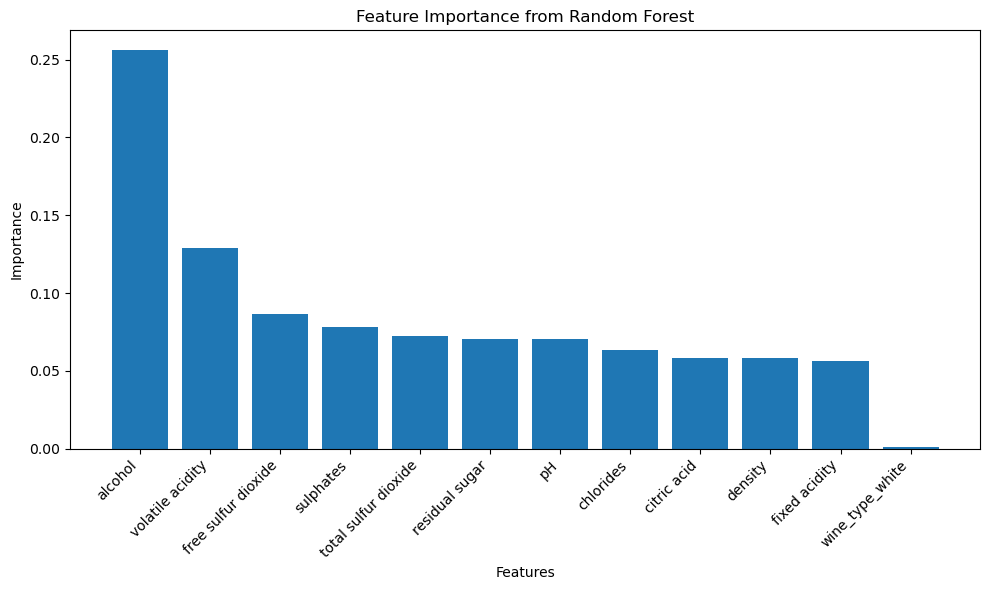

In [ ]:
# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


#### Ensemble Methods
Combining the predictions of Random Forest and Gradient Boosting using a Stacked Regressor can leverage the strengths of both models.

In [ ]:
from sklearn.ensemble import StackingRegressor

# Define the base models
estimators = [
    ('rf', best_rf_random_model),
    ('gbr', best_gbr_random_model)
]

# Create Stacking Regressor
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
)

stacked_model.fit(X_train, y_train)
stacked_predictions = stacked_model.predict(X_test)

# Evaluate Stacked Model
stacked_mae = mean_absolute_error(y_test, stacked_predictions)
stacked_mse = mean_squared_error(y_test, stacked_predictions)

print(f"Stacked Model - MAE: {stacked_mae:.4f}, MSE: {stacked_mse:.4f}")


Stacked Model - MAE: 0.0664, MSE: 0.0099


#### Observation

As we can see, a nice improvement on both values when combining the models into a stacked model.

##### Key Takeaways:

Hyperparameter tuning improved both models' performance, particularly for Gradient Boosting.

Random Forest remains the best-performing model, with lower MAE and MSE across all evaluations.


### Model Training Results and Insights


##### Random Forest:


MAE improved from 0.0729 to 0.0726.

MSE improved from 0.0103 to 0.0102.



##### Gradient Boosting:

MAE improved from 0.0886 to 0.0699.

MSE improved from 0.0128 to 0.0111.

##### After Optimizations

Stacked Model - MAE: 0.0664, MSE: 0.0099

##### Feature Importance:

The most important features influencing wine quality were:

# Challenges Faced, Solutions Implemented, and Future Directions

Throughout the model selection, data handling, and training process, I encountered several key challenges and took steps to overcome them:

1. Data Quality and Outliers:  
   Challenge: The raw wine dataset contained a few variables with significant outliers (residual sugar, free sulfur dioxide, and total sulfur dioxide). These outliers could skew the model’s understanding of the underlying data distribution, potentially leading to poor generalization and less stable model performance.  
   Solution: I implemented a systematic outlier capping strategy. Using the Interquartile Range (IQR), I identified extreme values and capped them at the lower and upper thresholds. This helped create a more uniform distribution without completely discarding information. As a result, the model became more robust to unusual values and less prone to instability during training.

2. Feature Scaling and Normalization:
   Challenge: The wide range of feature values (residual sugarspanning a large interval) introduced scaling discrepancies that could negatively impact models that assume features are on a similar scale (such as Gradient Boosting models).  
   Solution: I applied Min-Max normalization to bring all features into the [0, 1] range. This facilitated better model training convergence, allowed the gradient-based learners to find optimal solutions more efficiently, and helped ensure that no single feature dominated the training process due to scale.

3. Model Selection Complexity:
   Challenge: Identifying the best model to predict wine quality was non-trivial. While Random Forests and Gradient Boosting Regressors are both strong candidates, their performance can vary widely depending on hyperparameter configurations, data distributions, and feature interactions. Initially, the chosen defaults did not yield optimal results, leaving room for performance improvements.  
   Solution:I tackled this challenge through hyperparameter tuning using Grid Search. By systematically exploring combinations of parameters (e.g., n_estimators, max_depth, and learning_rate), I identified configurations that minimized error metrics. Hyperparameter tuning notably improved the performance of both the Random Forest and Gradient Boosting models. Additionally, experimenting with ensemble techniques, such as a Stacking Regressor, further enhanced predictive performance by leveraging the complementary strengths of multiple models.


---

**Remaining Issues and Future Work:**

- Model Interpretability:
  Although feature importance helps, more interpretable model forms or techniques like SHAP (SHapley Additive exPlanations) could provide even deeper insights into model decisions, making the results more actionable.

- Hyperparameter Optimization Methods:
  While Grid Search was effective, it can be computationally intensive. Alternatives like Bayesian Optimization or genetic algorithms might find better hyperparameters faster, allowing for a more efficient search of the model space.
